# Size and Frequency analysis for H and V pol

## No legs

Done post Milos' advice for setting entities to unused rather than vacuum permittivity

In [5]:
import sys
sys.path.append('/Users/sstk4353/packages/.')


from WIPL_python_analysis.SinglePolPlots import SinglePolPlots
from WIPL_python_analysis.DualPol import DualPol
from WIPL_python_analysis.DictToSinglePolResults import OutputDictToSinglePolResultsConverter as converter
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('./')

In [6]:
def plot_corrected_rcs(df, title=None):
    phi = df['phi']
    corrected_rcs = df['Corrected_RCS']
    
    plt.figure(figsize=(8, 6))
    plt.plot(phi, corrected_rcs, label='Corrected RCS')
    plt.xlabel('Azimuth (degrees)')
    plt.ylabel('Corrected RCS (cm^2)')

    if title:
        plt.title(title)

    plt.legend()
    plt.show()

In [7]:
BASE_DRIVE_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/Bernard_ellipsoid_comparison/'
BERNARD_PATH = 'Bernard/'
ELLIPSOID_PATH = 'Ellipsoid/'

In [8]:
scale_list = ['0206', '0553', '1000', '1588']
pol_list = ['H', 'V']
frequency_name_list = ['020', '027', '037', '049', '067', '090', '120', '160', '220', '300']
frequencies = [2,2.7,3.7,4.9,6.7,9,12,16,22,30]

In [9]:
def wavelength(frequencies):
    return 3e10 / (np.array(frequencies) * 1e9)

In [10]:
wavelengths = wavelength(frequencies)

In [11]:
single_pol_result_dict = {z: {x : {y : [] for y in pol_list} for x in scale_list} for z in ['Bernard', 'Ellipsoid']}

In [12]:
active_scales = scale_list
active_pols = pol_list

In [13]:
for scale in active_scales:
    for pol in active_pols:
        for freq in frequency_name_list:
            path = BASE_DRIVE_PATH + ELLIPSOID_PATH + f'parameterised/dict/size_frequency_analysis/Ellipsoid_parameterised_{freq}_{pol}_{scale}_p0_s0_dict.pkl'
            conv = converter.from_pickle(path)
            df = conv.generate_output_df()
            
            output_path = BASE_DRIVE_PATH + ELLIPSOID_PATH + f'parameterised/csv/size_frequency_analysis/Ellipsoid_parameterised_{freq}_{pol}_{scale}_p0_s0_df.csv'
            df.to_csv(output_path)
            single_pol_result_dict['Ellipsoid'][scale][pol].append(df)

In [14]:
for scale in active_scales:
    for pol in active_pols:
        for freq in frequency_name_list:
            path = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/dict/size_frequency_analysis/Bernard_parameterised_{freq}_{pol}_M_{scale}_body_wing_p0_s0_dict.pkl'
            conv = converter.from_pickle(path)
            df = conv.generate_output_df()
            
            output_path = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/csv/size_frequency_analysis/Bernard_parameterised_{freq}_{pol}_M_{scale}_body_wing_p0_s0_df.csv'
            df.to_csv(output_path)
            single_pol_result_dict['Bernard'][scale][pol].append(df)

In [15]:
V_corrs = {x : [] for x in scale_list}
H_corrs = {x : [] for x in scale_list}
V_rmse = {x : [] for x in scale_list}
H_rmse = {x : [] for x in scale_list}

for scale in active_scales: 
    for freq in range(10):
        H_corrs[scale].append(single_pol_result_dict['Bernard'][scale]['H'][freq]['Corrected_RCS'].corr(single_pol_result_dict['Ellipsoid'][scale]['H'][freq]['Corrected_RCS']))
        V_corrs[scale].append(single_pol_result_dict['Bernard'][scale]['V'][freq]['Corrected_RCS'].corr(single_pol_result_dict['Ellipsoid'][scale]['V'][freq]['Corrected_RCS']))
        V_B = single_pol_result_dict['Bernard'][scale]['V'][freq]['Corrected_RCS']
        V_E = single_pol_result_dict['Ellipsoid'][scale]['V'][freq]['Corrected_RCS']
        H_B = single_pol_result_dict['Bernard'][scale]['H'][freq]['Corrected_RCS']
        H_E = single_pol_result_dict['Ellipsoid'][scale]['H'][freq]['Corrected_RCS']
        V_rmse[scale].append(np.sqrt(np.mean((V_B - V_E)**2))/np.mean(V_B))
        H_rmse[scale].append(np.sqrt(np.mean((H_B - H_E)**2))/np.mean(H_B))


In [16]:
len(V_rmse['0206']), len(V_corrs['0206']), len(H_rmse['0206']), len(H_corrs['0206'])

(10, 10, 10, 10)

Text(0.5, 0, 'Wavelength (cm)')

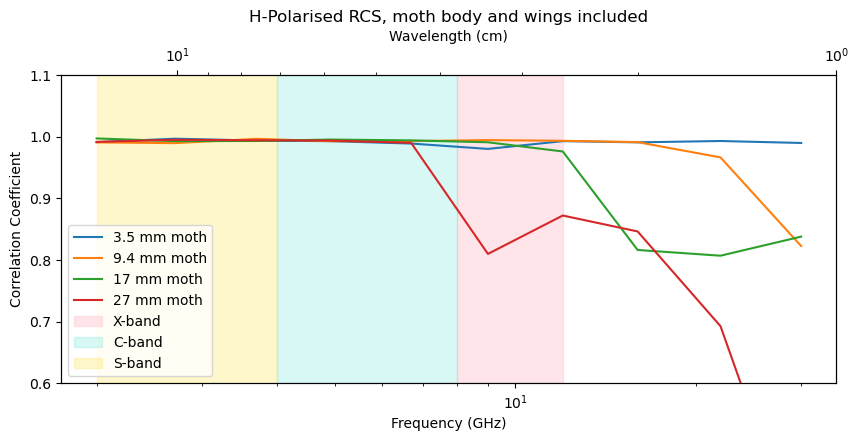

In [42]:
pol = 'H'

wavelengths = wavelength(frequencies)

wavelength_body_ratio = wavelengths/1.7
body_wavelength_ratio = 1.7/np.array(wavelengths)

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.set_xscale('log')

# Plot each moth dataset
for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    ax1.plot(frequencies, H_corrs[scale], label=f'{length} mm moth')

# Axis labels and limits
ax1.set_title(f'{pol}-Polarised RCS, moth body and wings included')
ax1.set_ylabel('Correlation Coefficient')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylim(0.6, 1.1)

# Highlight frequency bands
ax1.axvspan(8, 12, color='pink', alpha=0.4, label='X-band')
ax1.axvspan(4, 8, color='turquoise', alpha=0.2, label='C-band')
ax1.axvspan(2, 4, color='gold', alpha=0.2, label='S-band')

# Legend
ax1.legend()

# Create second x-axis for wavelength
ax2 = ax1.twiny()
ax2.set_xscale('log')
ax2.set_xlim(wavelengths[0], wavelengths[9])
ax2.set_xlabel('Wavelength (cm)')

# with open('plots/freq_sweep_body_wing_H.pkl', 'wb') as f:
#     pickle.dump(fig, f)

## Plotting

/var/folders/hq/kb5mxt3j4m1fs9p7jgvy96vh0000gr/T/ipykernel_45198/87613642.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


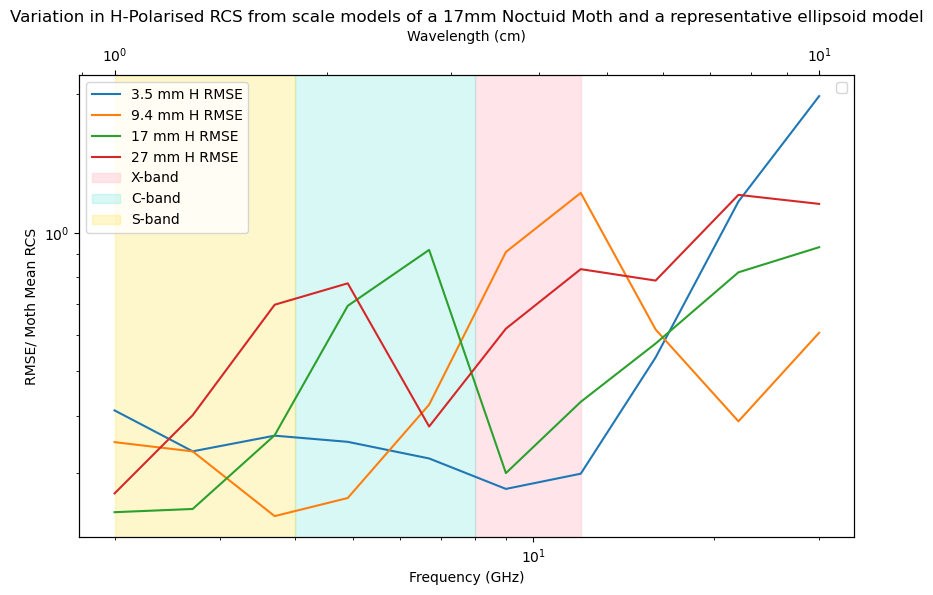

In [18]:
pol = 'H'

wavelengths = wavelength(frequencies)

wavelength_body_ratio = wavelengths/1.7
body_wavelength_ratio = 1.7/np.array(wavelengths)

plt.figure(figsize=(10, 6))
plt.xscale('log')
for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    plt.plot(frequencies, H_rmse[scale], label=f'{length} mm {pol} RMSE')

plt.title(f'Variation in {pol}-Polarised RCS from scale models of a 17mm Noctuid Moth and a representative ellipsoid model')
plt.ylabel('RMSE/ Moth Mean RCS')
plt.yscale('log')
plt.xlabel('Frequency (GHz)')
#plt.ylim(0.25,1.1)
# plt.axvline(x=3.2/0.64, color='r', linestyle='--', label='X-band')
# plt.axvline(x=5/0.64, color='g', linestyle='--', label='C-band')
# plt.axvline(x=10/0.64, color='pink', linestyle='--', label='S-band')

# plt.axvline(x=1.7/10, color='pink', linestyle='--', label='S-band')
# plt.axvline(x=1.7/5, color='g', linestyle='--', label='C-band')
# plt.axvline(x=1.7/3.2, color='r', linestyle='--', label='X-band')

plt.axvspan(8, 12, color='pink', alpha=0.4, label='X-band')
plt.axvspan(4, 8, color='turquoise', alpha=0.2, label='C-band')
plt.axvspan(2, 4, color='gold', alpha=0.2, label='S-band')
plt.legend()

# Create the second x-axis (wavelength)
ax2 = plt.twiny()  # Create a second axes sharing the y-axis

# Set the x-axis limits for wavelength, corresponding to the frequency limits
ax2.set_xscale('log') # Important: Set the scale to logarithmic
#ax2.set_xlim(wavelengths[0], wavelengths[9]) # calculate wavelength limits and reverse them!
ax2.set_xlabel('Wavelength (cm)')

plt.legend()


plt.show()

/var/folders/hq/kb5mxt3j4m1fs9p7jgvy96vh0000gr/T/ipykernel_45198/384309788.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


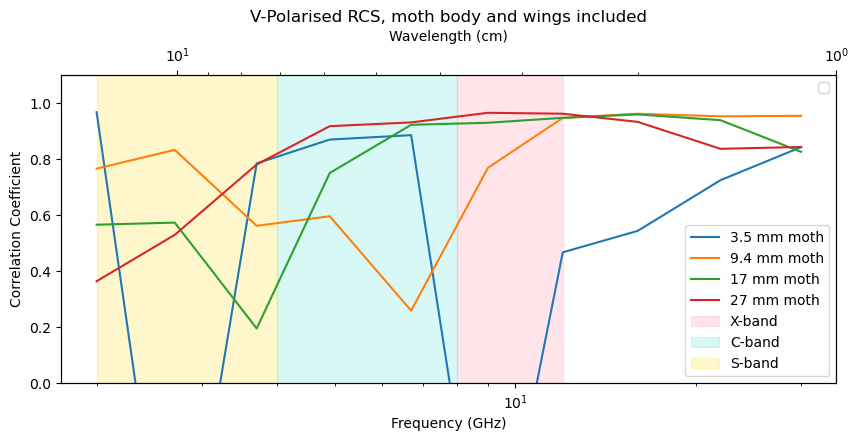

In [43]:
pol = 'V'

wavelengths = wavelength(frequencies)

wavelength_body_ratio = wavelengths/1.7
body_wavelength_ratio = 1.7/np.array(wavelengths)

plt.figure(figsize=(10, 4))
plt.xscale('log')
for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    plt.plot(frequencies, V_corrs[scale], label=f'{length} mm moth')

plt.title(f'{pol}-Polarised RCS, moth body and wings included')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Frequency (GHz)')
plt.ylim(0,1.1)
# plt.axvline(x=3.2/0.64, color='r', linestyle='--', label='X-band')
# plt.axvline(x=5/0.64, color='g', linestyle='--', label='C-band')
# plt.axvline(x=10/0.64, color='pink', linestyle='--', label='S-band')

# plt.axvline(x=1.7/10, color='pink', linestyle='--', label='S-band')
# plt.axvline(x=1.7/5, color='g', linestyle='--', label='C-band')
# plt.axvline(x=1.7/3.2, color='r', linestyle='--', label='X-band')

plt.axvspan(8, 12, color='pink', alpha=0.4, label='X-band')
plt.axvspan(4, 8, color='turquoise', alpha=0.2, label='C-band')
plt.axvspan(2, 4, color='gold', alpha=0.2, label='S-band')
plt.legend()

# Create the second x-axis (wavelength)
ax2 = plt.twiny()  # Create a second axes sharing the y-axis

# Set the x-axis limits for wavelength, corresponding to the frequency limits
ax2.set_xscale('log') # Important: Set the scale to logarithmic
ax2.set_xlim(wavelengths[0], wavelengths[9]) # calculate wavelength limits and reverse them!
ax2.set_xlabel('Wavelength (cm)')

plt.legend()


plt.show()
# with open('freq_sweep_body_wing_V.pkl', 'wb') as f:
#     pickle.dump(plt.gcf(), f)

In [20]:
def get_horizontal_returned_power(df):
    horizontal_field = df['Ephi'].astype(complex).to_numpy()
    power = np.abs(horizontal_field)**2
    return power

/var/folders/hq/kb5mxt3j4m1fs9p7jgvy96vh0000gr/T/ipykernel_45198/1153802303.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


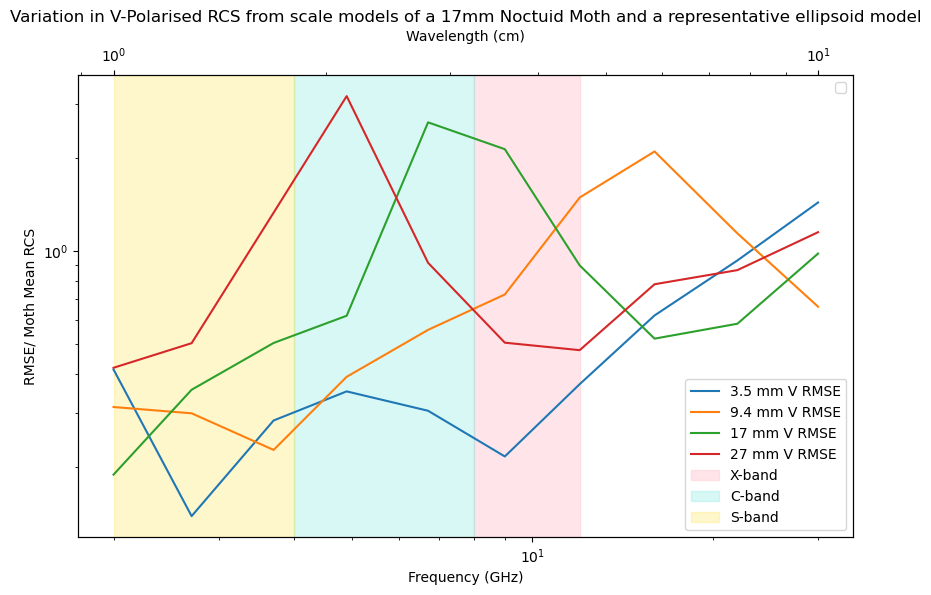

In [21]:
pol = 'V'

wavelengths = wavelength(frequencies)

wavelength_body_ratio = wavelengths/1.7
body_wavelength_ratio = 1.7/np.array(wavelengths)

plt.figure(figsize=(10, 6))
plt.xscale('log')
for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    plt.plot(frequencies, V_rmse[scale], label=f'{length} mm {pol} RMSE')

plt.title(f'Variation in {pol}-Polarised RCS from scale models of a 17mm Noctuid Moth and a representative ellipsoid model')
plt.ylabel('RMSE/ Moth Mean RCS')
plt.yscale('log')
plt.xlabel('Frequency (GHz)')
#plt.ylim(0.25,1.1)
# plt.axvline(x=3.2/0.64, color='r', linestyle='--', label='X-band')
# plt.axvline(x=5/0.64, color='g', linestyle='--', label='C-band')
# plt.axvline(x=10/0.64, color='pink', linestyle='--', label='S-band')

# plt.axvline(x=1.7/10, color='pink', linestyle='--', label='S-band')
# plt.axvline(x=1.7/5, color='g', linestyle='--', label='C-band')
# plt.axvline(x=1.7/3.2, color='r', linestyle='--', label='X-band')

plt.axvspan(8, 12, color='pink', alpha=0.4, label='X-band')
plt.axvspan(4, 8, color='turquoise', alpha=0.2, label='C-band')
plt.axvspan(2, 4, color='gold', alpha=0.2, label='S-band')
plt.legend()

# Create the second x-axis (wavelength)
ax2 = plt.twiny()  # Create a second axes sharing the y-axis

# Set the x-axis limits for wavelength, corresponding to the frequency limits
ax2.set_xscale('log') # Important: Set the scale to logarithmic
#ax2.set_xlim(wavelengths[0], wavelengths[9]) # calculate wavelength limits and reverse them!
ax2.set_xlabel('Wavelength (cm)')

plt.legend()


plt.show()

In [22]:
#

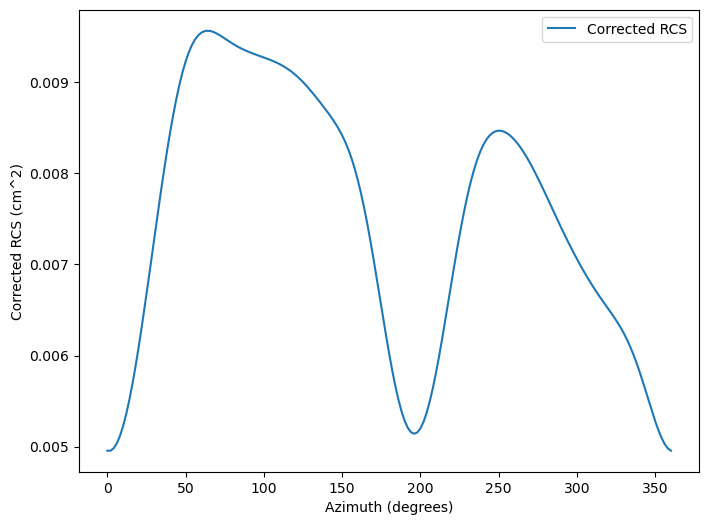

In [23]:
plot_corrected_rcs(single_pol_result_dict['Bernard']['1000']['V'][3])

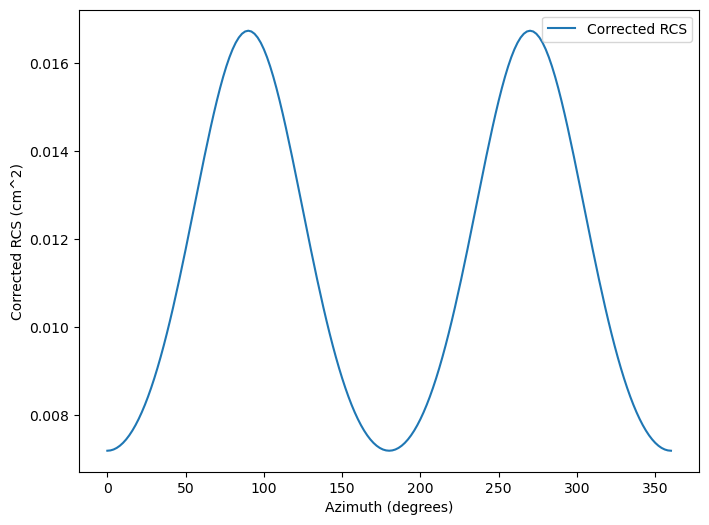

In [24]:
plot_corrected_rcs(single_pol_result_dict['Ellipsoid']['1000']['V'][3])